In [1]:
# Ignore non-word in train.csv
with open('/home/ian/Dataset/QuoraQP/train.csv', 'r') as f:
    read_data = f.read()
    read_data = read_data.replace("?", " ")
    read_data = read_data.replace(",\"\",", ",\" \",")
    
with open('/home/ian/Dataset/QuoraQP/train_clean.csv', 'w') as f:
    f.write(read_data)

# Ignore non-word in train.csv
with open('/home/ian/Dataset/QuoraQP/test.csv', 'r') as f:
    read_data = f.read()
    read_data = read_data.replace("?", " ")
    read_data = read_data.replace(",\"\",", ",\" \",")
    
with open('/home/ian/Dataset/QuoraQP/test_clean.csv', 'w') as f:
    f.write(read_data)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

print('# File sizes')
for f in os.listdir('/home/ian/Dataset/QuoraQP'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('/home/ian/Dataset/QuoraQP/' + f) / 1000000, 2)) + 'MB')

# File sizes
train.csv                     63.4MB
test.csv                      314.02MB
sample_submission.csv         22.35MB
train_clean.csv               62.99MB
test_clean.csv                314.02MB


In [3]:
df_train = pd.read_csv('/home/ian/Dataset/QuoraQP/train_clean.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water,0


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933


Number of questions that appear multiple times: 111780



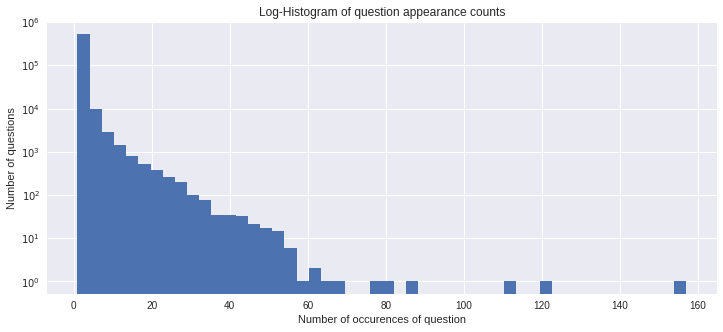

In [5]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

In [6]:
from sklearn.metrics import log_loss

p = df_train['is_duplicate'].mean() # Our predicted probability
print('Predicted score:', log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p))

df_test = pd.read_csv('/home/ian/Dataset/QuoraQP/test_clean.csv')
sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p})
sub.to_csv('naive_submission.csv', index=False)
sub.head()

Predicted score: 0.658527383984


,is_duplicate,test_id
0,0.369198,0
1,0.369198,1
2,0.369198,2
3,0.369198,3
4,0.369198,4


In [7]:
df_test = pd.read_csv('/home/ian/Dataset/QuoraQP/test_clean.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24 How...,How much cost does hair transplant require
2,2,What but is the best way to send money from Ch...,What you send money to China
3,3,Which food not emulsifiers,What foods fibre
4,4,"How ""aberystwyth"" start reading",How their can I start reading


In [8]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796


mean-train 59.82 std-train 31.96 mean-test 60.07 std-test 31.62 max-train 1169.00 max-test 1176.00


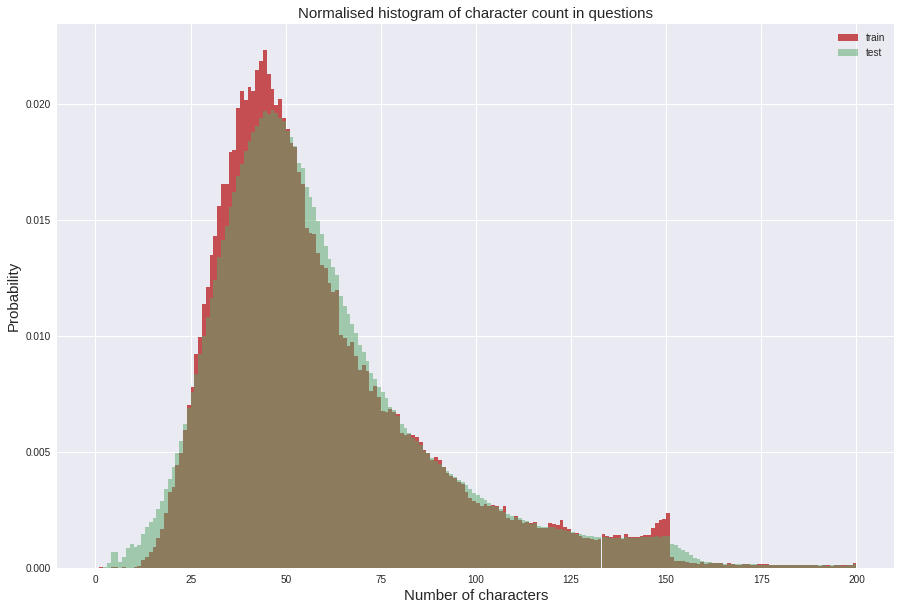

In [9]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

mean-train 12.12 std-train 5.96 mean-test 12.08 std-test 5.93 max-train 240.00 max-test 241.00


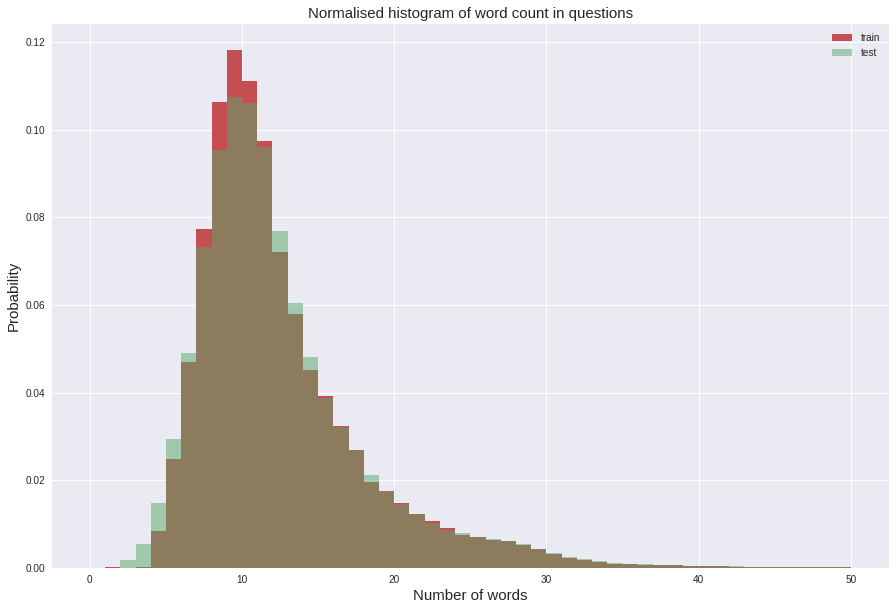

In [10]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

(-0.5, 1439.5, 1079.5, -0.5)

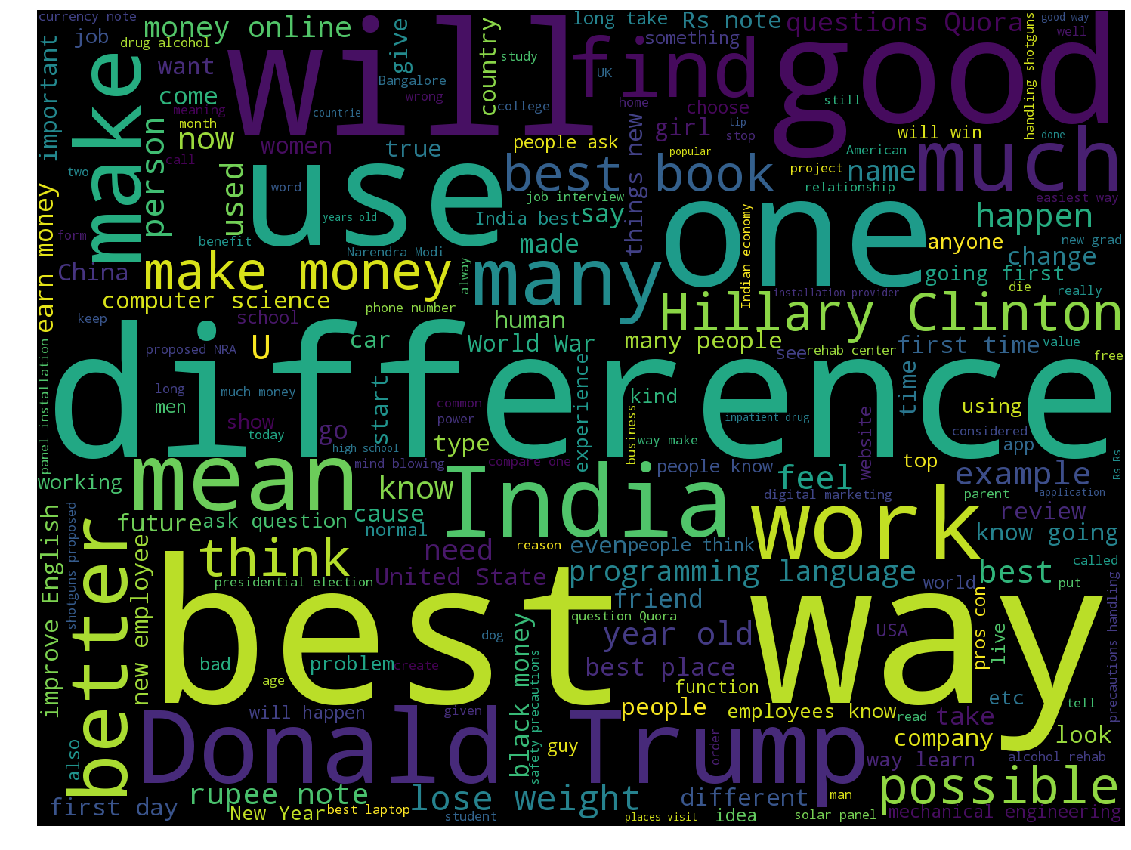

In [11]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [12]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 0.00%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


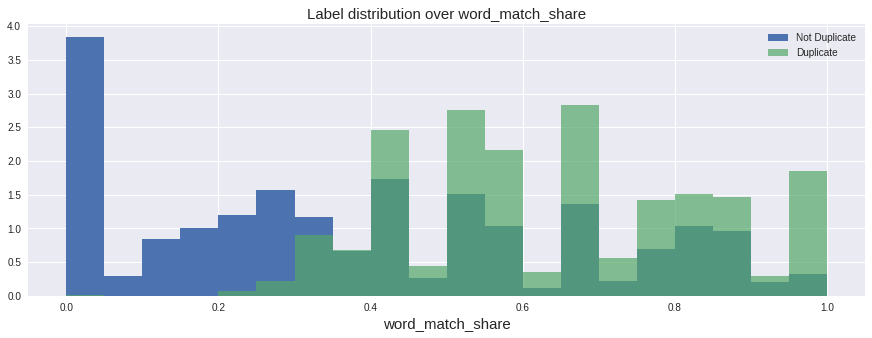

In [13]:
import nltk
nltk.data.path.append('/home/ian/nltk_data')

from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [14]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
#def get_weight(count, eps=10000, min_count=2):
#    if count < min_count:
#        return 0
#    else:
#        return 1 / (count + eps)
#
#eps = 5000 
#words = (" ".join(train_qs)).lower().split()
#counts = Counter(words)
#weights = {word: get_weight(count) for word, count in counts.items()}

qs = df_train['question1'].tolist() + df_train['question2'].tolist()
vectorizer = TfidfVectorizer(min_df=1)
tfidf = vectorizer.fit_transform(qs)
idf = vectorizer.idf_
dict_tfidf = dict(zip(vectorizer.get_feature_names(), idf))

In [15]:
print('Most common words and weights: \n')
print(sorted(dict_tfidf.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(dict_tfidf.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('what', 1.9399247964366455), ('the', 1.973746879295827), ('is', 2.149759724116616), ('how', 2.3162548532419418), ('to', 2.4976571376623244), ('in', 2.5052337935139097), ('do', 2.6520944807815461), ('of', 2.7251828782551408), ('are', 2.7516333056811715), ('and', 2.8923916025656324)]

Least common words and weights: 


[('0000', 13.909888957949875),
 ('000000', 13.909888957949875),
 ('00000000', 13.909888957949875),
 ('0000001', 13.909888957949875),
 ('00000074', 13.909888957949875),
 ('0000021210', 13.909888957949875),
 ('00001', 13.909888957949875),
 ('0001', 13.909888957949875),
 ('0002', 13.909888957949875),
 ('000ft', 13.909888957949875)]

In [32]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    print(len(q1words.keys()), '\n')
    print(len(q2words.keys()))
    
    shared_weights = [dict_tfidf[w] for w in q1words.keys() if w in q2words] + [dict_tfidf[w] for w in q2words.keys() if w in q1words]
    total_weights = [dict_tfidf[w] for w in q1words] + [dict_tfidf[w] for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

dict_tfidf['kohinoor']

11.558513700786397

In [30]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

6 

5
4 

9
6 

5
4 

9


KeyError: ('(koh-i-noor)', 'occurred at index 1')

In [16]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))

Original AUC: 0.75318446557
   TFIDF AUC: 0.740847608027


In [17]:
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in long_scalars


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

In [39]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

0.19124366100096607


In [40]:
# Finally, we split some of the data off for validation
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.683738	valid-logloss:0.683789


Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.



Will train until valid-logloss hasn't improved in 50 rounds.


[10]	train-logloss:0.607094	valid-logloss:0.607596


[20]	train-logloss:0.553303	valid-logloss:0.554176


[30]	train-logloss:0.514292	valid-logloss:0.51547


[40]	train-logloss:0.485283	valid-logloss:0.486713


[50]	train-logloss:0.463434	valid-logloss:0.46507


[60]	train-logloss:0.446731	valid-logloss:0.448542


[70]	train-logloss:0.433827	valid-logloss:0.435786


[80]	train-logloss:0.423815	valid-logloss:0.425902


[90]	train-logloss:0.416019	valid-logloss:0.418215


[100]	train-logloss:0.409922	valid-logloss:0.412212


[110]	train-logloss:0.40514	valid-logloss:0.407509


[120]	train-logloss:0.401359	valid-logloss:0.403791


[130]	train-logloss:0.398329	valid-logloss:0.400814


[140]	train-logloss:0.395987	valid-logloss:0.398518


[150]	train-logloss:0.394136	valid-logloss:0.396706


[160]	train-logloss:0.392644	valid-logloss:0.395243


[170]	train-logloss:0.391452	valid-logloss:0.394079


[180]	train-logloss:0.390489	valid-logloss:0.393143


[190]	train-logloss:0.389696	valid-logloss:0.392371


[200]	train-logloss:0.389071	valid-logloss:0.391764


[210]	train-logloss:0.388555	valid-logloss:0.391265


[220]	train-logloss:0.388126	valid-logloss:0.390854


[230]	train-logloss:0.38779	valid-logloss:0.39053


[240]	train-logloss:0.387514	valid-logloss:0.390271


[250]	train-logloss:0.387293	valid-logloss:0.390067


[260]	train-logloss:0.387059	valid-logloss:0.389837


[270]	train-logloss:0.38679	valid-logloss:0.389567


[280]	train-logloss:0.386594	valid-logloss:0.38938


[290]	train-logloss:0.386385	valid-logloss:0.389172


[300]	train-logloss:0.386209	valid-logloss:0.389001


[310]	train-logloss:0.386075	valid-logloss:0.388884


[320]	train-logloss:0.385932	valid-logloss:0.388742


[330]	train-logloss:0.385808	valid-logloss:0.388623


[340]	train-logloss:0.385703	valid-logloss:0.388521


[350]	train-logloss:0.385598	valid-logloss:0.388423


[360]	train-logloss:0.385504	valid-logloss:0.388337


[370]	train-logloss:0.385402	valid-logloss:0.388246


[380]	train-logloss:0.385335	valid-logloss:0.388183


[390]	train-logloss:0.385254	valid-logloss:0.388105


In [42]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('simple_xgb.csv', index=False)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
   
qs = df_train['question1'].tolist() + df_train['question2'].tolist()
#qs_count = Counter(qs)
vectorizer = TfidfVectorizer(min_df=1)
tfidf = vectorizer.fit_transform(qs[1])
idf = vectorizer.idf_
dict_tfidf = dict(zip(vectorizer.get_feature_names(), idf))

In [62]:
qs[1]
vectorizer = TfidfVectorizer(min_df=1)
tfidf = vectorizer.fit_transform(['I love state_of_the_art paper', 'I do not love new tech'])
idf = vectorizer.idf_
dict_tfidf = dict(zip(vectorizer.get_feature_names(), idf))

In [63]:
list(dict_tfidf.keys())

['do', 'love', 'new', 'not', 'paper', 'state_of_the_art', 'tech']

In [18]:
qs[1]

'What is the story of Kohinoor (Koh-i-Noor) Diamond '

In [73]:
import nltk
nltk.data.path.append('/home/ian/nltk_data')

sentence = "I am a 19-year-old man who love state-of-the-art paper and F-14 flight"

tokenizer = nltk.tokenize.MWETokenizer()

#tokenizer = nltk.tokenize.regexp_tokenize(sentence, '\w+|\$[\d\.]+|\S+')
#tokens = tokenizer.tokenize(sentence)
#tokens = nltk.word_tokenize(sentence)
tokens

['I',
 'am',
 'a',
 '19-year-old',
 'man',
 'who',
 'love',
 'state-of-the-art',
 'paper',
 'and',
 'F-14',
 'flight']

In [106]:
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree

def get_continuous_chunks(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    prev = None
    continuous_chunk = []
    current_chunk = []

    for idx in range(len(chunked)):
        i = chunked[idx]
        if type(i) == Tree:
            current_chunk.append(" ".join([token for token, pos in i.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue

    named_entity = " ".join(current_chunk)
    if named_entity not in continuous_chunk:
       continuous_chunk.append(named_entity)
    return continuous_chunk

#txt = "Barack Obama is a great person."
#txt = "I am a 19-year-old man who love state-of-the-art paper and New York city"
txt = "Barack Obama is the husband of Michelle Obama"
print(get_continuous_chunks(txt))

['Barack Obama', 'Michelle Obama']
